In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns 
from sklearn import metrics
import pandas as pd
import numpy as np


In [2]:
# Loading data from a CSV file named "CO2 Emissions.csv" into a pandas DataFrame called "df"
df = pd.read_csv("CO2 Emissions.csv")

In [3]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [6]:
df.isnull().sum() 
# to check any null values

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [7]:
numeric_cols = df.select_dtypes(exclude='object').columns
categorical_cols = df.select_dtypes(include='object').columns

In [8]:
df[numeric_cols]

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...
7380,2.0,4,10.7,7.7,9.4,30,219
7381,2.0,4,11.2,8.3,9.9,29,232
7382,2.0,4,11.7,8.6,10.3,27,240
7383,2.0,4,11.2,8.3,9.9,29,232


In [9]:
df[categorical_cols]

,Make,Model,Vehicle Class,Transmission,Fuel Type
0,ACURA,ILX,COMPACT,AS5,Z
1,ACURA,ILX,COMPACT,M6,Z
2,ACURA,ILX HYBRID,COMPACT,AV7,Z
3,ACURA,MDX 4WD,SUV - SMALL,AS6,Z
4,ACURA,RDX AWD,SUV - SMALL,AS6,Z
...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,AS8,Z
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,AS8,Z
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,AS8,Z
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,AS8,Z


In [10]:
df['Fuel Type'].unique()

array(['Z', 'D', 'X', 'E', 'N'], dtype=object)

Arranging the fuel types based on their typical carbon dioxide (CO2) emissions, from highest to lowest, would generally look like this:

1. Diesel Fuel (Z or D): Diesel fuel combustion tends to produce higher CO2 emissions compared to other fuels due to its higher carbon content and energy density.

2. Unleaded Gasoline (X): Gasoline combustion emits CO2, but it typically results in lower CO2 emissions compared to diesel fuel.

3. Ethanol (E): Ethanol, when used as a fuel, can have lower CO2 emissions than gasoline, but the exact emissions depend on the ethanol blend and production process.

4. Natural Gas (N): Natural gas is considered a cleaner-burning fuel and generally emits fewer CO2 emissions per unit of energy compared to diesel or gasoline.

It's important to note that the actual CO2 emissions can vary depending on factors such as the efficiency of the engine, vehicle technology, and emission control systems. Additionally, the production and transportation of these fuels also have an impact on their overall carbon footprint. The use of biofuels like ethanol can reduce CO2 emissions, but the environmental impact can vary depending on the source and production methods.

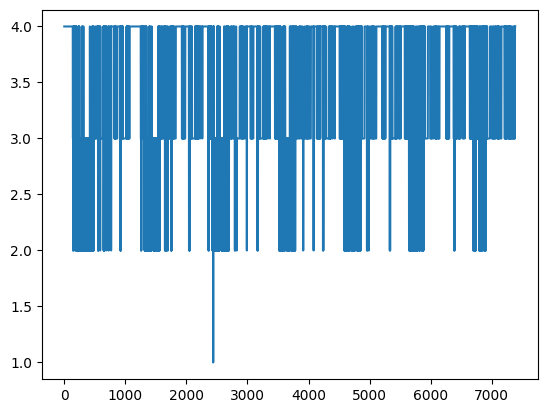

In [11]:
df['Fuel Type'] = df['Fuel Type'].replace({'Z' :4 , 'D' :4, 'X':3, 'E' :2, 'N' : 1})
plt.plot(df['Fuel Type'])

In [12]:
df['Fuel Type'].value_counts()
df = df[df['Fuel Type']!=1]
df['Fuel Type'].value_counts()

Fuel Type
3    3637
4    3377
2     370
Name: count, dtype: int64

[Text(3, 0, '3'), Text(4, 0, '4'), Text(2, 0, '2')]

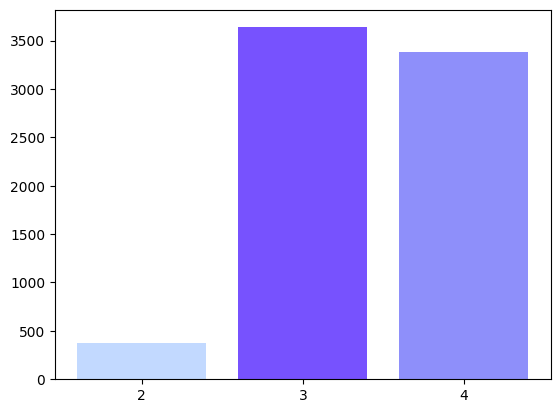

In [13]:
fig, ax = plt.subplots()
ax.bar(df['Fuel Type'].value_counts().index, df['Fuel Type'].value_counts().values, color = ['#7752FE','#8E8FFA',
'#C2D9FF'])
ax.set_xticks(df['Fuel Type'].value_counts().index)
ax.set_xticklabels(df['Fuel Type'].value_counts().index)


In [14]:
len(df['Make'].value_counts())

42

             Make               Model  CO2 Emissions(g/km)
5575      BUGATTI              Chiron                  522
6640      BUGATTI              Chiron                  522
4509      BUGATTI              CHIRON                  522
7059  LAMBORGHINI  Aventador Roadster                  493
6046  LAMBORGHINI  Aventador Roadster                  493


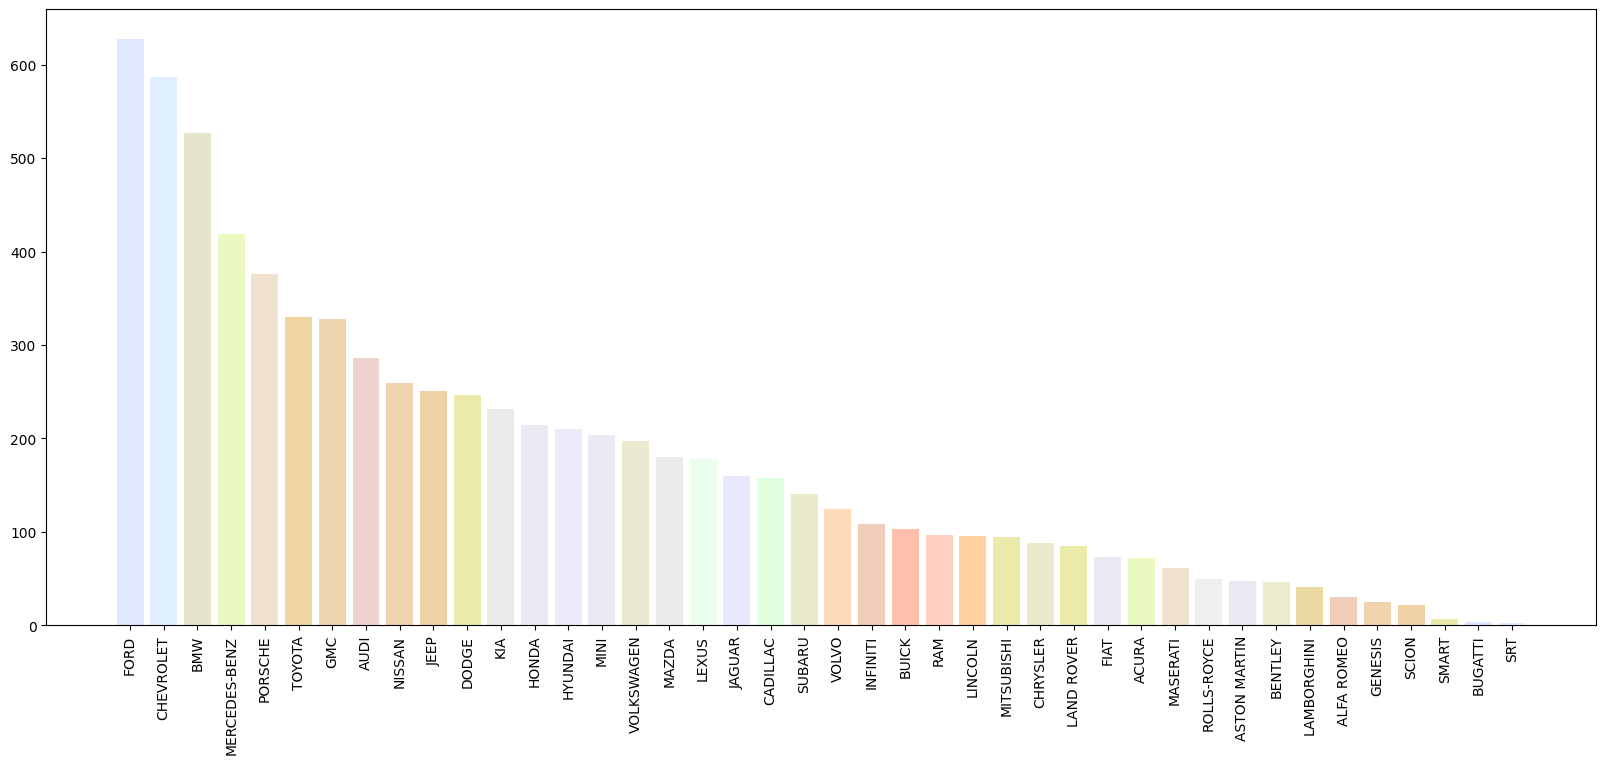

In [15]:
slightly_darker_colors = [
    "#E0E8FF", "#E0EFFF", "#E5E5CC", "#EAF8C2", "#EFE1CD", "#EED5A1", "#EED4B0", "#EED4CF", "#EED3AC",
    "#EED2A4", "#EAEAAB", "#EAEAEA", "#EAEAF3", "#EAEAFA", "#EAEAF5", "#EBEAD0", "#EBEBEB", "#EBFEEB",
    "#E8E8FF", "#E0FFE0", "#E9EBCC", "#FFDAB9", "#EFCDB9", "#FFC0AB", "#FFD1C4", "#FFD1A1", "#EAEAAB",
    "#E9EBCC", "#EAEAAB", "#EBEAF3", "#EAF8C2", "#EFE1CD", "#EFEFEF", "#EAEAF5", "#EBEBD0", "#EBD9A2",
    "#EFCDB9", "#EED3AC", "#EED2A4", "#EAEAAB", "#E0E8FF", "#E0EFFF", "#E8E8FF", "#E5E5CC", "#E5E5E5"
]
df_sorted_by_co2 = df.sort_values(by='CO2 Emissions(g/km)',ascending=False)
print(df_sorted_by_co2[['Make', 'Model', 'CO2 Emissions(g/km)']].head())
fig, ax = plt.subplots(figsize=(20,8))
ax.bar(df_sorted_by_co2["Make"].value_counts().index, df_sorted_by_co2["Make"].value_counts(),color = slightly_darker_colors)
plt.xticks(rotation = 90)
plt.show()

In [16]:
label = LabelEncoder()
df_sorted_by_co2['Make'] = label.fit_transform(df_sorted_by_co2['Make'])
df_sorted_by_co2.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
5575,6,Chiron,TWO-SEATER,8.0,16,AM7,4,26.8,16.6,22.2,13,522
6640,6,Chiron,TWO-SEATER,8.0,16,AM7,4,26.8,16.6,22.2,13,522
4509,6,CHIRON,TWO-SEATER,8.0,16,AM7,4,26.8,16.6,22.2,13,522
7059,22,Aventador Roadster,TWO-SEATER,6.5,12,AM7,4,26.6,15.8,21.7,13,493
6046,22,Aventador Roadster,TWO-SEATER,6.5,12,AM7,4,26.6,15.8,21.7,13,493


In [17]:
df_sorted_by_co2 = df_sorted_by_co2.drop(df[['Model', 'Vehicle Class', 'Transmission']], axis = 1)

In [18]:
df_sorted_by_co2.head()

,Make,Engine Size(L),Cylinders,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
5575,6,8.0,16,4,26.8,16.6,22.2,13,522
6640,6,8.0,16,4,26.8,16.6,22.2,13,522
4509,6,8.0,16,4,26.8,16.6,22.2,13,522
7059,22,6.5,12,4,26.6,15.8,21.7,13,493
6046,22,6.5,12,4,26.6,15.8,21.7,13,493


In [19]:
import warnings

# Suppress all warnings (not recommended for production code)
warnings.filterwarnings("ignore")


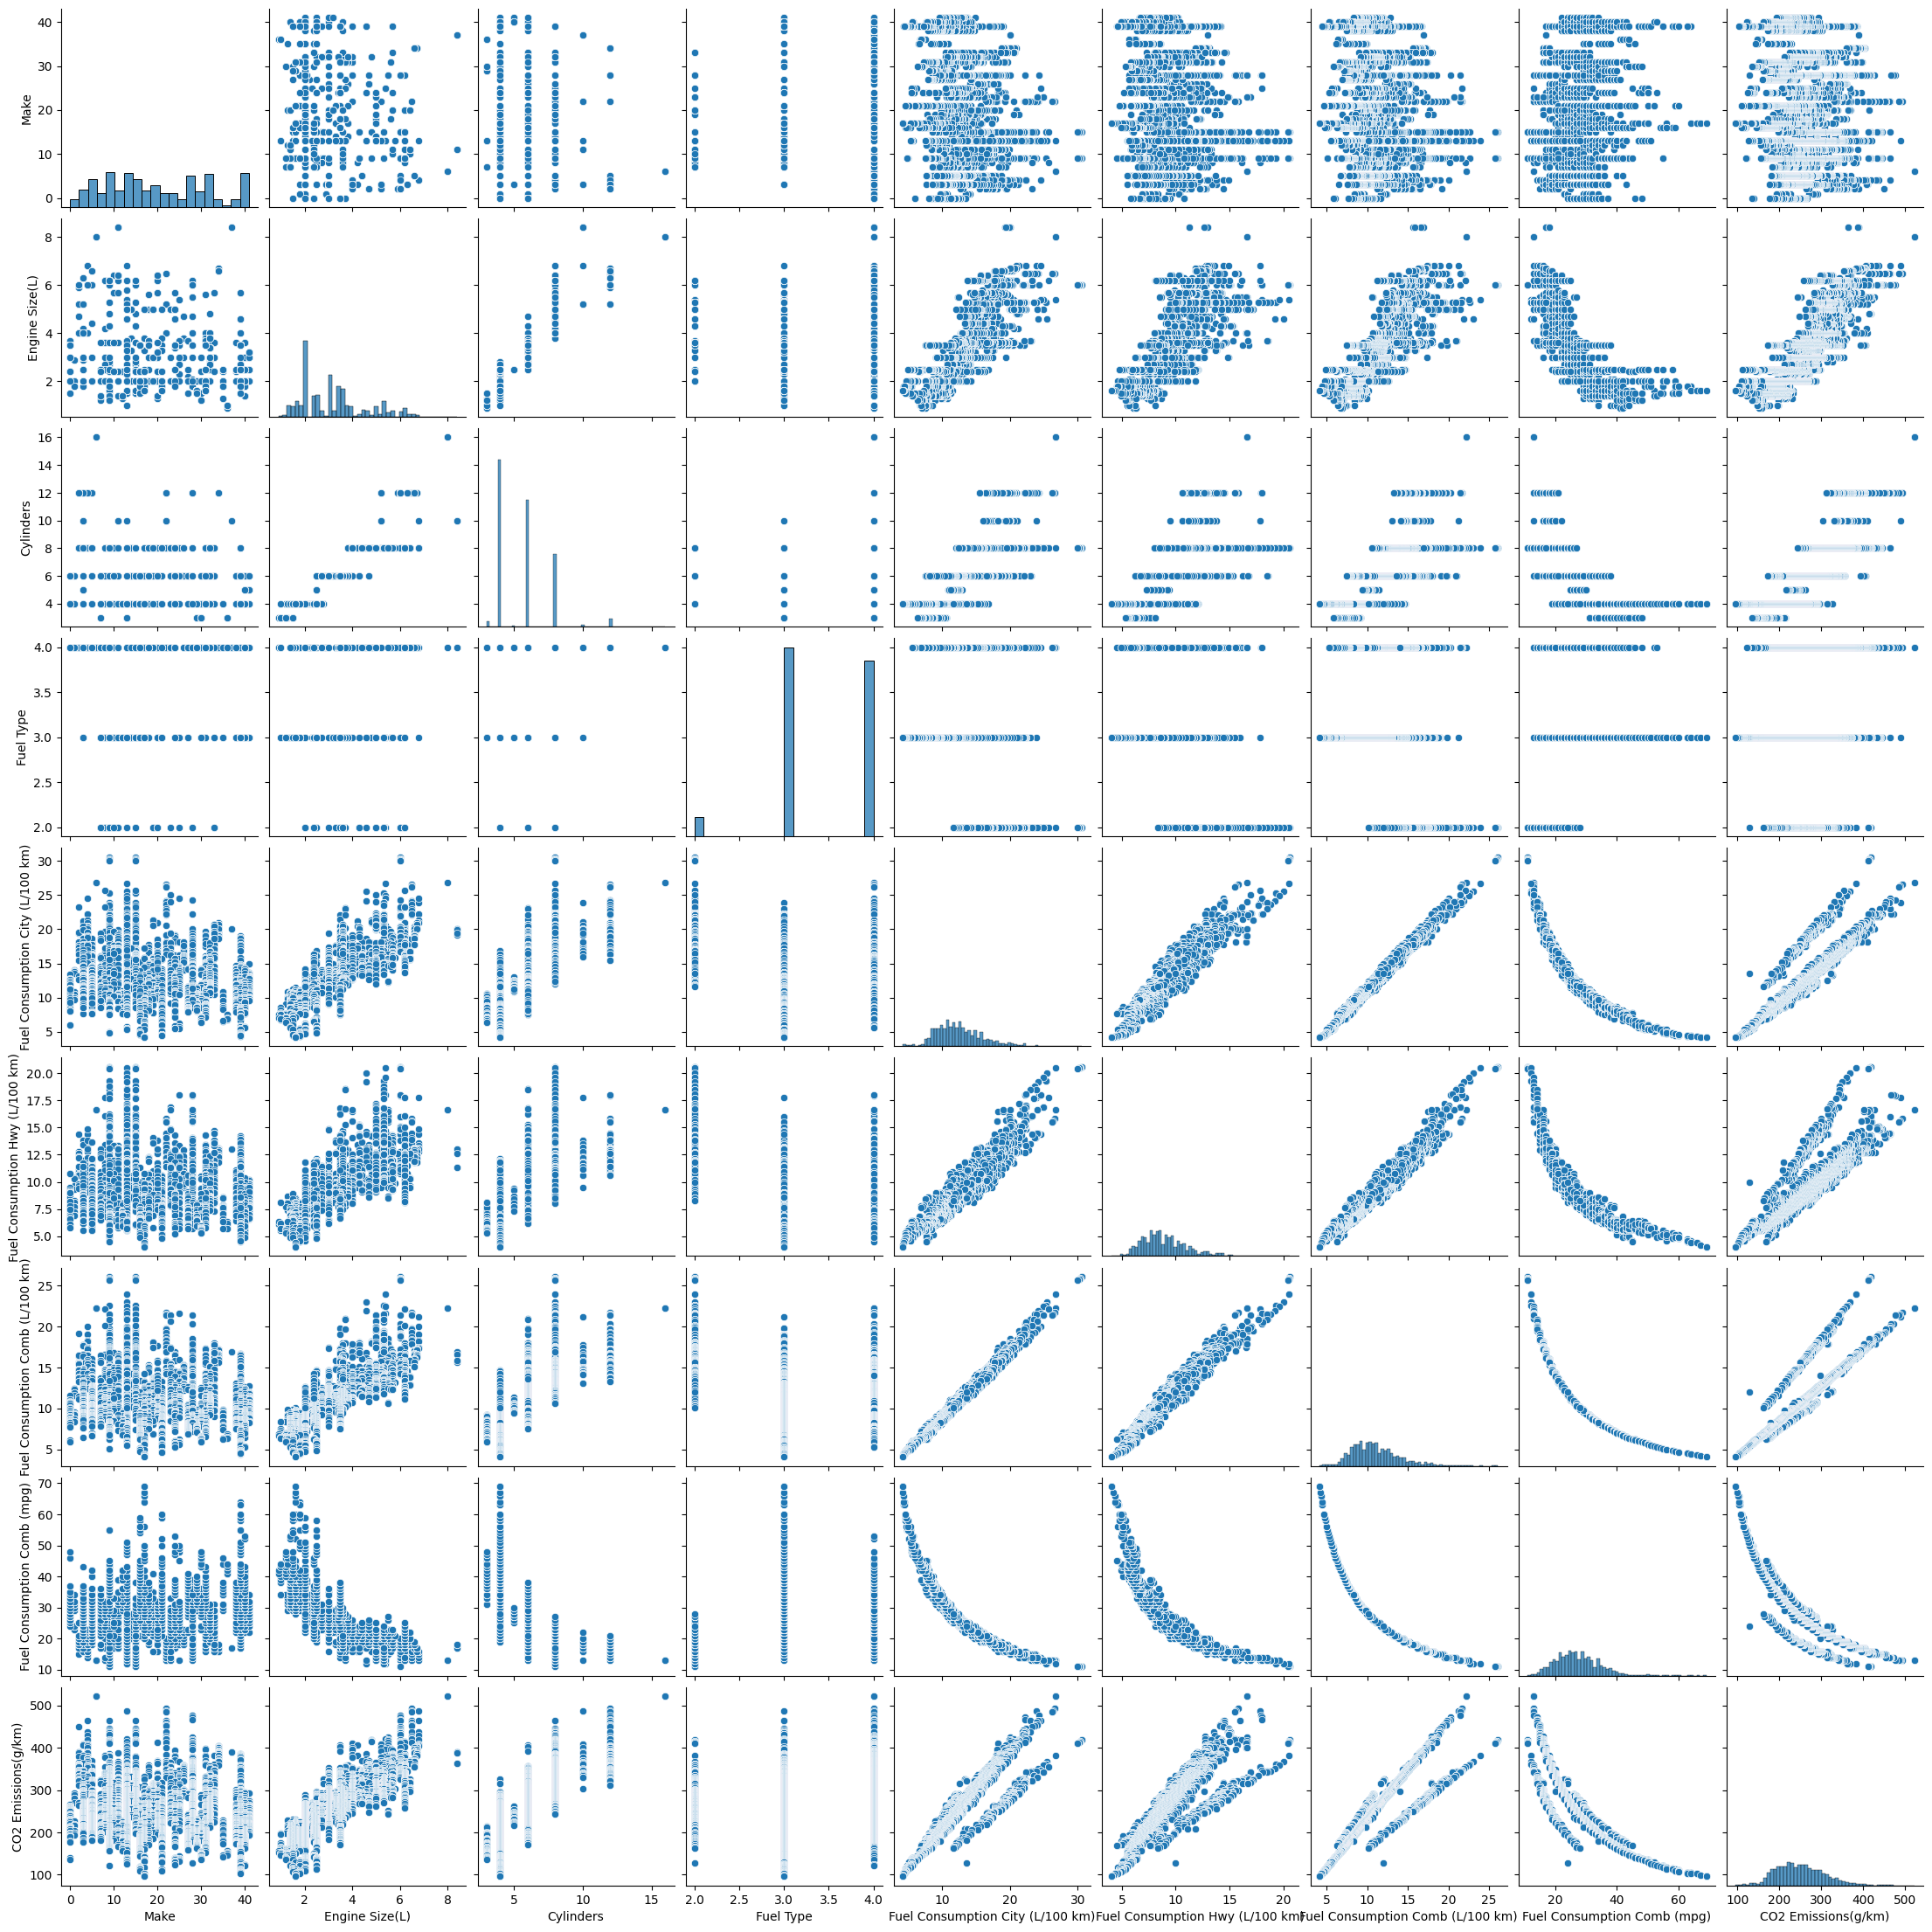

In [20]:
sns.pairplot(df_sorted_by_co2)
plt.show()


In [21]:
df_sorted_by_co2 = df_sorted_by_co2[df_sorted_by_co2['Engine Size(L)']<7]
df_sorted_by_co2 = df_sorted_by_co2[df_sorted_by_co2['Fuel Consumption City (L/100 km)']<25]
df_sorted_by_co2 = df_sorted_by_co2.drop(['Fuel Type','Fuel Consumption Comb (mpg)'], axis =1) 

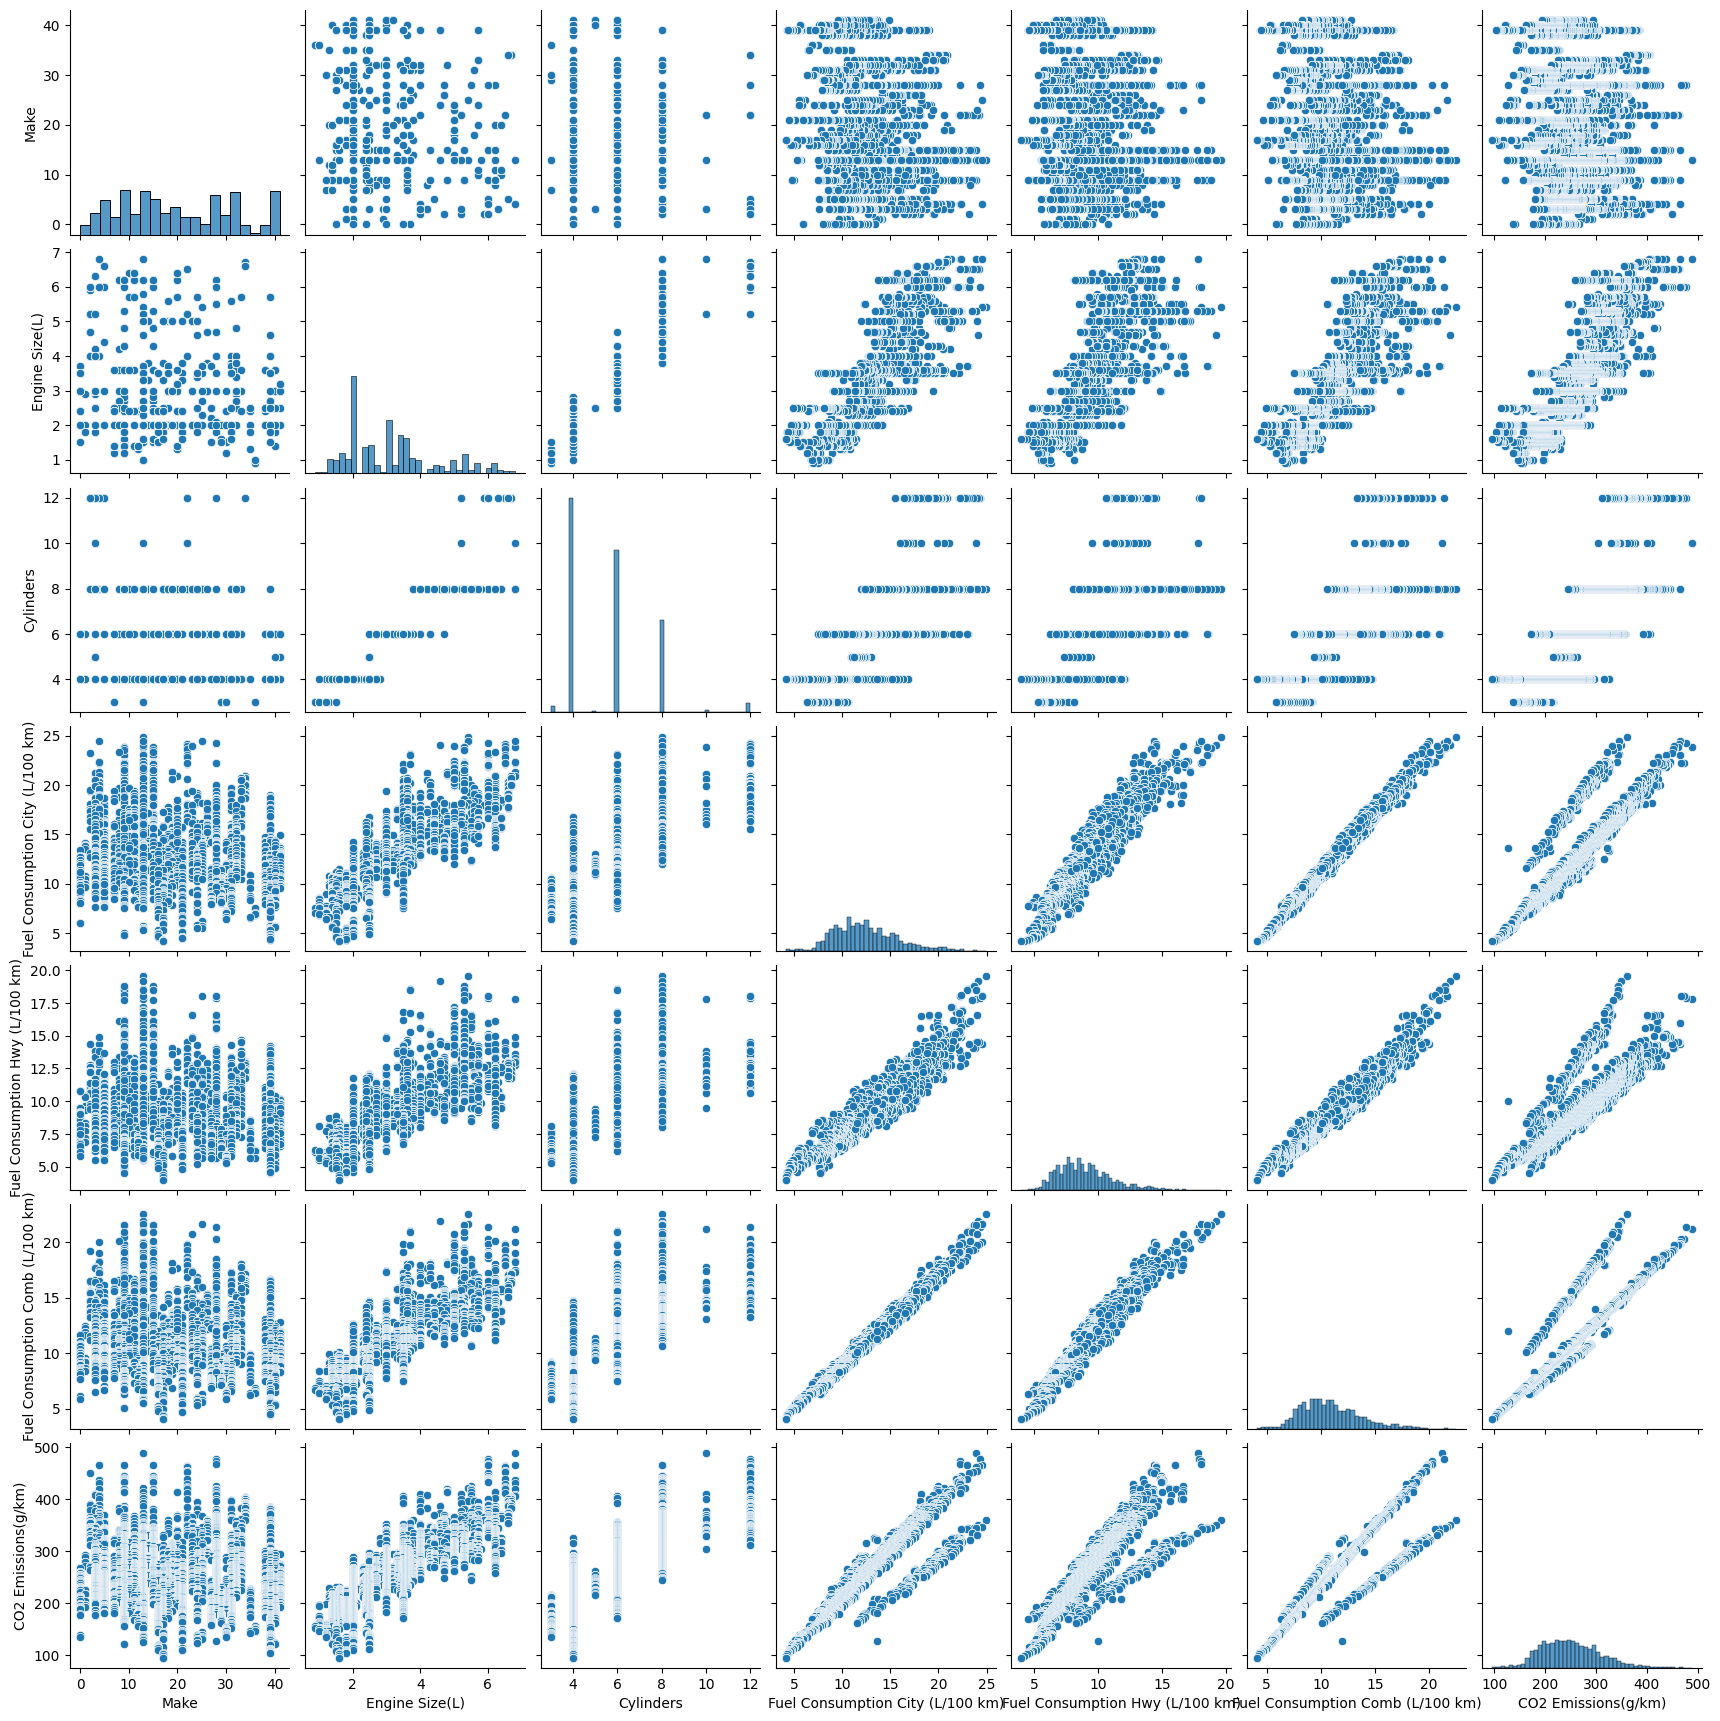

In [22]:
sns.pairplot(df_sorted_by_co2)
plt.show()


In [23]:
x = df_sorted_by_co2.drop(['CO2 Emissions(g/km)'], axis =1)
y = df_sorted_by_co2['CO2 Emissions(g/km)']
x.head()

,Make,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km)
349,13,6.8,10,23.9,17.8,21.2
2971,28,6.0,12,24.3,17.9,21.4
5126,28,6.0,12,22.2,18.0,20.3
4049,28,6.0,12,22.2,18.0,20.3
5511,4,6.8,8,24.5,14.4,20.0


In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [25]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [26]:
model.score(x_test,y_test)

0.8830723911833279

In [27]:
model.score(x_train,y_train)

0.8787532366094554

In [29]:
pred = model.predict(x_test)

In [33]:

print("R^2:",metrics.r2_score(y_test, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, pred))
print("MSE:",metrics.mean_squared_error(y_test, pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R^2: 0.8830723911833279
Adjusted R^2: 0.8825931796717842
MAE: 13.15306215079841
MSE: 402.40464544571125
RMSE: 20.06002605795195



- R^2 (R-squared): 0.8831
- Adjusted R^2: 0.8826
- Mean Absolute Error (MAE): 13.15
- Mean Squared Error (MSE): 402.40
- Root Mean Squared Error (RMSE): 20.06

These metrics provide information about the goodness of fit and accuracy
